In [ ]:
# Task 3: Linear Regression – Forecasting Area-Level Real Estate Prices

## Objective:
Predict future area-level average prices using Linear Regression based on:
- Infrastructure development
- Commercial property value
- Rental trends


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
np.random.seed(42)
n_areas = 50

data = {
    "area_name": [f"Area_{i}" for i in range(n_areas)],
    "current_avg_price": np.random.normal(5000, 800, n_areas),
    "distance_to_city_center_km": np.random.uniform(5, 30, n_areas),
    "upcoming_metro_station": np.random.randint(0, 2, n_areas),
    "new_highway_within_5km": np.random.randint(0, 2, n_areas),
    "proximity_to_IT_hub_km": np.random.uniform(2, 25, n_areas),
    "upcoming_airport_distance_km": np.random.uniform(10, 50, n_areas),
    "infra_project_score": np.random.randint(1, 10, n_areas),
    "commercial_value_index": np.random.normal(7000, 1000, n_areas),
    "rental_value_index": np.random.normal(35, 5, n_areas),
    "years_to_forecast": np.random.choice([3, 5], n_areas),
    "expected_appreciation_rate": np.random.uniform(0.06, 0.12, n_areas)
}

df = pd.DataFrame(data)
df["future_avg_price"] = df["current_avg_price"] * (1 + df["expected_appreciation_rate"]) ** df["years_to_forecast"]
df.head()


,area_name,current_avg_price,distance_to_city_center_km,upcoming_metro_station,new_highway_within_5km,proximity_to_IT_hub_km,upcoming_airport_distance_km,infra_project_score,commercial_value_index,rental_value_index,years_to_forecast,expected_appreciation_rate,future_avg_price
0,Area_0,5397.371322,8.523106,1,1,9.377941,23.015988,1,6864.282618,44.756400,3,0.118674,7556.017884
1,Area_1,4889.388559,25.054925,1,0,6.289926,39.859656,9,6206.494982,34.799574,3,0.093360,6390.641516
2,Area_2,5518.150830,6.863766,1,1,2.937828,35.985316,6,6631.550011,37.647178,3,0.079361,6938.953129
3,Area_3,6218.423885,29.672173,1,0,15.590538,43.968936,7,7157.201855,34.080541,5,0.062604,8424.374229
4,Area_4,4812.677300,24.306119,1,0,17.583980,36.304516,7,6884.526590,34.549607,5,0.115479,8311.759274


In [ ]:
X = df.drop(columns=["area_name", "future_avg_price"])
y = df["future_avg_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


MAE: 208.86
MSE: 58992.77
R² Score: 0.9642


In [ ]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance:")
print(coeff_df)


Feature Importance:
                         Feature   Coefficient
10    expected_appreciation_rate  25559.731908
9              years_to_forecast    578.371842
2         upcoming_metro_station    149.154566
1     distance_to_city_center_km      2.856882
0              current_avg_price      1.375266
5   upcoming_airport_distance_km      0.147645
7         commercial_value_index      0.023368
4         proximity_to_IT_hub_km     -5.230878
6            infra_project_score     -8.719769
8             rental_value_index     -9.137568
3         new_highway_within_5km    -30.451288


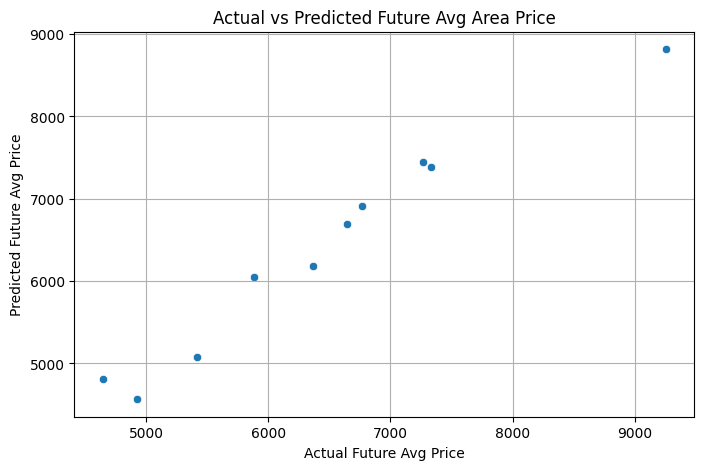

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Future Avg Price")
plt.ylabel("Predicted Future Avg Price")
plt.title("Actual vs Predicted Future Avg Area Price")
plt.grid(True)
plt.show()
